# Principal Component Analysis

# Spike sorting

## 1. Introduction:

Extracellular recordings can provide information about neuronal activity in the brain. A recorded signal by the microwire will be amplified and filtered to create waveforms that are a combination of background activity and nearby neuronal firing from a clusters of neurons in the form of spikes. This waveform is further processed (Ex. using amplitude thresholding) to identify the spikes. The next step is to group these spikes into clusters. The assumption is that neurons tend to fire spikes of a particular shape and by exploring diffrences and similarities in the spike shape, one can potentially separate spikes according to their particular population of neurons.

In this activity, we will process sample neuronal voltage recordings and use the Principal Component Analysis (PCA) to separate spikes.

Reference:

http://www.scholarpedia.org/article/Spike_sorting

## 2.1 Read the data:

You are provided with a matlab file **SpikeSorting.mat** that contains waveform volatage recording from population of neurons. Read this file using **scipy** module. This data has been preprocesed and centered for each spike to coincide with the others. Each spike contains 70 recorings representing 70 $ms$ of data. 

In [1]:
# read mat files containing the voltage data

import scipy.io
import numpy as np

# note: convert to pandas data frame or numpy
mat = scipy.io.loadmat('SpikeSorting.mat')


## 2.1 Extract and display the data:

The Matlab file contains two sets of arrays: 

1) spikes : indicies where each spike is detected in the voltage recording.

2) voltage: recording of neuronal firing as voltages. Use the indicies in the **spikes** array to extract recordings for each spike (recall that each spike has 70 recordings).

Use numpy to generate a two dimensional array in which rows are observed spikes and columns are voltage readings for each spike. Display all spikes in one figure.

(3298, 70)


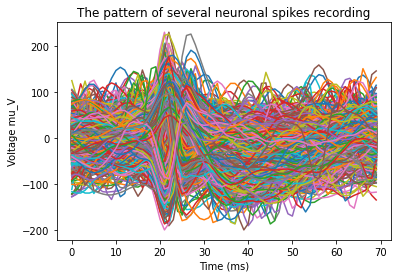

In [2]:
import matplotlib.pyplot as plt
# allow using latex in matplotlib
# plt.rcParams['text.usetex'] = True

# Data structure

# spikes array: contains indicies defining the initial location of each spike in the voltage array. 
# The total number of elements in the spikes array defines the total number of spikes in the recorded data

# voltage array: recorded voltage waveforms for different spikes. Each spike has 70 recordings. Use indicies in the 
# "spikes" array to generate a two dimensional array in which rows are observed spikes and columns 
# are voltage readings for each spike


spikes = np.squeeze(mat['spikes'])
voltages = np.squeeze(mat['voltage'])

obser_num = np.size(mat['spikes'])
num_samples = 70 # hard coded

data_array = np.zeros((obser_num,num_samples))

print(data_array.shape)

for n in range(obser_num):
    
    data_array[n,:] = voltages[spikes[n]: spikes[n] + 70]
    
    plt.plot(np.arange(70),data_array[n,:])

plt.xlabel(r'Time (ms)')
# plt.ylabel(r'Voltage $\displaystyle (\mu V)$')
plt.ylabel(r'Voltage mu_V')
plt.title('The pattern of several neuronal spikes recording')
plt.show()

## 3.1 PCA:

We are interested in correlating the spikes in the waveform to the activity of neurons in the population of neurons. The difficulty arrises from the fact that observed spikes can arrise from the different neuron population that are firing in the neighborhood of microwire. Inteactions between the spikes from different neuronal population can siginificantly change the voltage recording shape. For example the peak of action potential from neuronal acticivity from one cell can be reduced if it concides with the dip of action potential from another cell firing. Historically, PCA has been proposed as a method to seperate spikes into clusters of neuronal activity. 

Use numpy to calculate eigenvalues and eigenvectors of mean subtracted data. Display the individual and cumulative explained variance

## 3.2 Visualization of principal components and data reconstruction

Generate a new 2D plot to display the elements of the 4 principal componets associated with the largest variation in data. Note that each spike can be reconstructed using a weighted sum of these principal components. Reconstruct and display the first spike in the data using the first prinicpal component only. Then repeat for the first two, three, four, and all principle components.

## 3.3 Data projection

Project the mean subtracted data onto the first principal component and plot the result as a histogram. Then repeat for the first two pincipal components and plot the result as a scatter plot